In [9]:
import ee
import geemap


In [14]:
import os
os.getcwd()

'/Users/michaeltang/Downloads/GISC412_project_repo/Canterbury_birds/final_code'

In [15]:
os.chdir('/Users/michaeltang/Downloads/GISC412_project_repo/Canterbury_birds/GIS_file')

In [17]:
os.getcwd()

'/Users/michaeltang/Downloads/GISC412_project_repo/Canterbury_birds/GIS_file'

In [18]:
ee.Authenticate()
ee.Initialize(project='ee-1lab')
# 4/1AQlEd8xPLicUSUAUllTqKzsC3pUaCLB_J-xBKVkJTlDB-5GqDqpcVzrJOSg

In [24]:
import geopandas as gpd

cantbury_bound = gpd.read_file("/Users/michaeltang/Downloads/GISC412_project_repo/Canterbury_birds/GIS_file/canterbury_region.shp")


<Axes: >

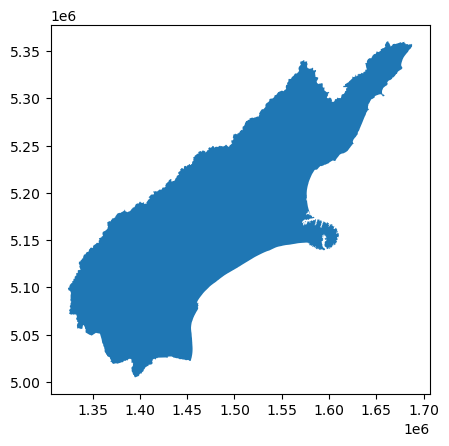

In [25]:
cantbury_bound.plot()

# Sentinel 2 data

Sentinel-2 is a wide-swath, high-resolution, multi-spectral imaging mission supporting Copernicus Land Monitoring studies, including the monitoring of vegetation, soil and water cover, as well as observation of inland waterways and coastal areas.

In [23]:
# Define start and end dates using ee.Date objects
start_date = ee.Date('2023-01-01')
end_date = ee.Date('2023-3-31')

# Create an ee.DateRange using the start and end dates
date_range = ee.DateRange(start_date, end_date)

# Define a geometry (point) using longitude and latitude coordinates

#aoi = geemap.shp_to_ee("GIS_file/canterbury_region.shp")
aoi = geemap.shp_to_ee("/Users/michaeltang/Downloads/GISC412_project_repo/Canterbury_birds/GIS_file/canterbury_region.shp")



The input shapefile is invalid.


In [25]:
# Load and filter the image collection based on dates and location
s2_collection = ee.ImageCollection('MODIS/061/MOD11A1')\
                  .filterDate(date_range)\
                  .filterBounds(aoi)\
                  .select('LST_Day_1km')
# Print the number of images in the filtered collection
collection_size = s2_collection.size()
print('Data type for s2_collection TEMP(3 MONTH): ', type(s2_collection))
print('Number of Images in Filtered Collection:', collection_size.getInfo())

Data type for s2_collection TEMP(3 MONTH):  <class 'ee.imagecollection.ImageCollection'>
Number of Images in Filtered Collection: 89


In [26]:
mean_temperature = s2_collection.mean().clip(aoi)

In [27]:
mean_temperature.getInfo()

{'type': 'Image',
 'bands': [{'id': 'LST_Day_1km',
   'data_type': {'type': 'PixelType',
    'precision': 'double',
    'min': 0,
    'max': 65535},
   'crs': 'EPSG:4326',
   'crs_transform': [1, 0, 0, 0, 1, 0]}]}

In [28]:
# covert mean_temperature kelvin to degree
temp_degree = mean_temperature.multiply(0.02).subtract(273.15)

In [29]:
temp_degree.getInfo()

{'type': 'Image',
 'bands': [{'id': 'LST_Day_1km',
   'data_type': {'type': 'PixelType',
    'precision': 'double',
    'min': -273.15,
    'max': 1037.5500000000002},
   'crs': 'EPSG:4326',
   'crs_transform': [1, 0, 0, 0, 1, 0]}]}

In [30]:
Map = geemap.Map()
Map.centerObject(aoi, zoom=10)

# Visualization parameters
vis_params = {
    'min': 10,    # Adjust these min/max temperature values based on your data
    'max': 45,
    'palette': ['blue', 'green', 'yellow', 'red']  # Adjust color palette
}
Map.addLayer(temp_degree, vis_params, 'Mean Temperature (3 months)')

Map

Map(center=[-43.57320440043739, 171.56968710827522], controls=(WidgetControl(options=['position', 'transparent…

In [31]:
# downloading a gee image
# Define the export parameters
# Specify the image to be exported (srtm_chc)
image = temp_degree

# Description for the exported task. This will be the description shown ont the GEE Code Editor
description = 'export_dem'

# Folder in Google Drive where the exported data will be stored. If the folder does not exist, it will be created
folder = 'GEE lab'


# Coordinate Reference System (CRS) for the exported image (e.g., EPSG:2193)
crs = 'EPSG:2193'

# Initialize an Earth Engine batch export task
# Create an export task using Export.image.toDrive
task = ee.batch.Export.image.toDrive(
    image=image,
    description=description,
    folder=folder,
    region=aoi,
    crs=crs
)

# Start the export task
task.start()
